## 이상치 확인
- 데이터의 구간을 벗어나는 값
- 그렇지 않은 경우에는 분석가가 이상치를 판단하는 기준을 정해야함.
- 보통 수치형 변수의 경우 IQR 방식으로 이상치 판단

In [2]:
#와인데이터
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load=load_wine()
wine=pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class']=wine_load.target
wine['Class']=wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

C:\Users\taeeu\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.el2c6ple4zyw3eceviv3oxxgrn2nrfm2.gfortran-win_amd64.dll
C:\Users\taeeu\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import matplotlib.pyplot as plt
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,class_2


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Class

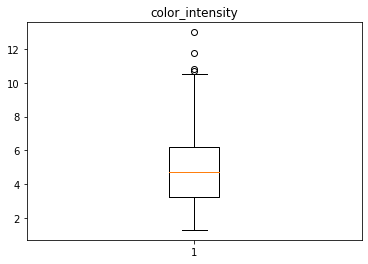

In [6]:
## 박스플랏
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()
#4개의 이상치 확인

In [7]:
Q1=wine['color_intensity'].quantile(q=0.25)
Q3=wine['color_intensity'].quantile(q=0.75)

IQR=Q3-Q1
data_IQR = wine[(wine['color_intensity']>=Q1-1.5*IQR) & (wine['color_intensity']>=Q3+1.5*IQR)]

In [13]:
#IQR방법은 아주많은 값들을 이상치로 간주할 수 있기 때문에
#무조건 IQR*1.5규칙을 사용하기 보다는 데이터의 유형을 살펴보고 필요에따라 IQR에 곱하는 값을 조정
data_IQR

151    10.80
158    13.00
159    11.75
166    10.68
Name: color_intensity, dtype: float64

## 이상치 정제 - (1)이상치 제거

In [14]:
drop_outliers=wine.drop(index=data_IQR.index)

In [15]:
#이상치를 삭제하기 전과 후의 데이터 shape
print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


## 이상치 정제 - (2)이상치 대체

In [21]:
#이상치를 NaN으로 변경
import numpy as np
wine=wine.copy()
wine['color_intensity'][data_IQR.index]=np.NaN

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_24304/1516212502.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine['color_intensity'][data_IQR.index]=np.NaN


In [22]:
wine.loc[data_IQR.index, 'color_intensity']=np.NaN

In [26]:
#NaN이 된 이상치를 평균값으료 변경
wine['color_intensity']
wine['color_intensity'].fillna(wine['color_intensity'].mean(),inplace=True)
wine.loc[data_IQR.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64